<a href="https://colab.research.google.com/github/ankitpoddar09/Ankit1/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Preview
   Year    Month         GEO Product Category  \
0  2017  January  Province 1   Meat & Poultry   
1  2017  January  Province 1   Meat & Poultry   
2  2017  January  Province 1   Meat & Poultry   
3  2017  January  Province 1   Meat & Poultry   
4  2017  January  Province 1   Meat & Poultry   

                              Products  VALUE Taxable  Total tax rate  \
0      Beef stewing cuts, per kilogram  12.66      No            11.0   
1    Beef striploin cuts, per kilogram  21.94      No            11.0   
2  Beef top sirloin cuts, per kilogram  13.44      No            11.0   
3          Beef rib cuts, per kilogram  20.17      No            11.0   
4            Ground beef, per kilogram   9.12      No            11.0   

   Value after tax  Essential  COORDINATE      UOM  
0            12.66  Essential       11.10  Dollars  
1            21.94  Essential       11.20  Dollars  
2            13.44  Essential       11.30  Dollars  
3            20.17  Essential       11

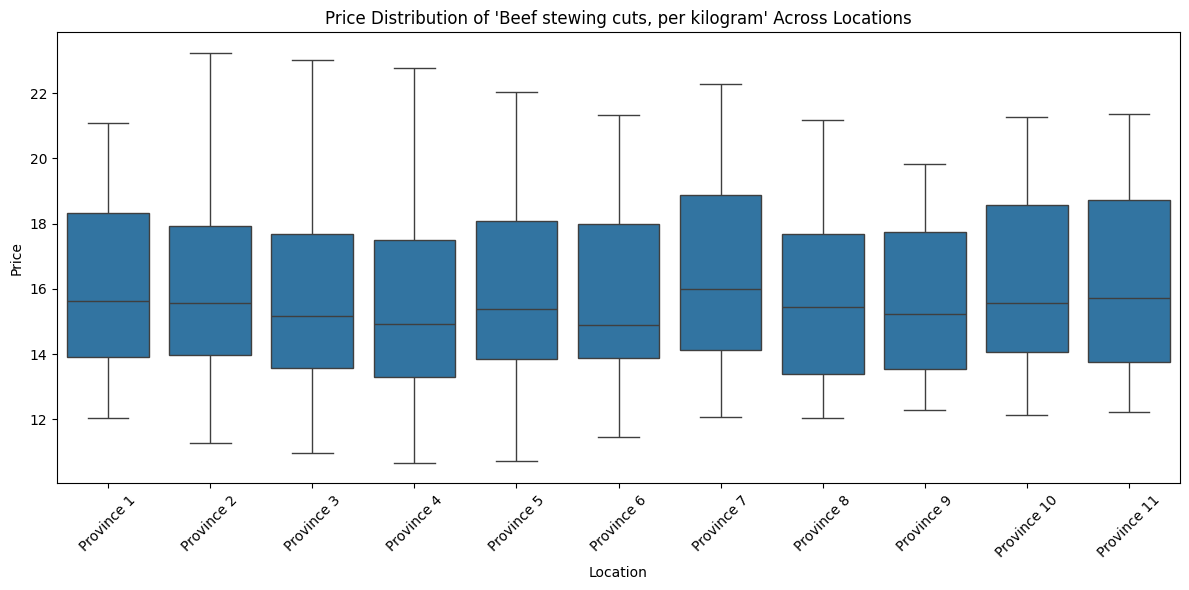

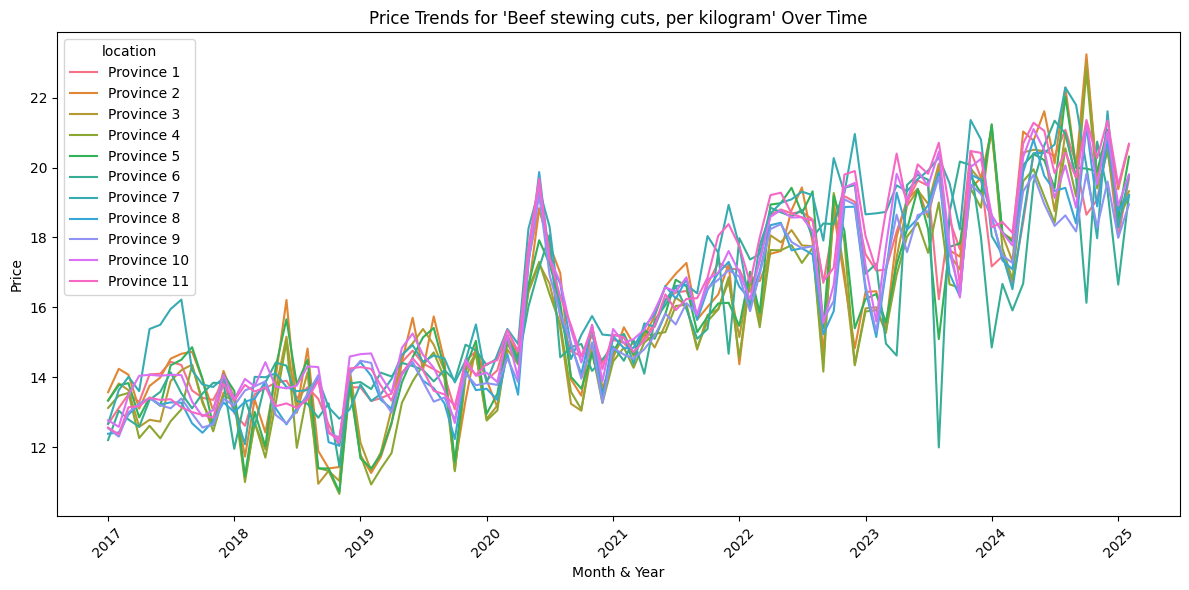

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Retail_Prices_of _Products.csv", on_bad_lines='skip', engine='python')
print("Dataset Preview")
print(df.head())
print("\nMissing Values Count")
print(df.isna().sum())
df_clean = df.dropna(subset=["VALUE", "GEO", "Products"])
product = "Beef stewing cuts, per kilogram"

# Rename columns for consistency with previous code structure
df_clean = df_clean.rename(columns={'VALUE': 'price', 'GEO': 'location', 'Products': 'product_name'})

filter_product = df_clean[df_clean["product_name"].str.contains(product, case=False)].copy()
print(f"\nFiltered Records for '{product}':")
print(filter_product.head())
min_price = filter_product["price"].min()
max_price = filter_product["price"].max()
avg_price = filter_product["price"].mean()
print(f"\nStatistics for {product}:\nLowest price: {min_price}\nHighest price: {max_price}\nAverage price: {avg_price:.2f}")
cheapest_locations = filter_product[filter_product["price"] == min_price]["location"].unique()
expensive_locations = filter_product[filter_product["price"] == max_price]["location"].unique()
print(f"\nCheapest at: {cheapest_locations}")
print(f"Most expensive at: {expensive_locations}")
plt.figure(figsize=(12, 6))
sns.boxplot(x="location", y="price", data=filter_product)
plt.title(f"Price Distribution of '{product}' Across Locations")
plt.xticks(rotation=45)
plt.ylabel("Price")
plt.xlabel("Location")
plt.tight_layout()
plt.show()

# Create 'month_year' column from 'Year' and 'Month'
df_clean['month_year'] = pd.to_datetime(df_clean['Year'].astype(str) + '-' + df_clean['Month'], format='%Y-%B')

product_time = df_clean[df_clean["product_name"].str.contains(product, case=False)].copy()

if not product_time.empty:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x="month_year", y="price", hue="location", data=product_time)
    plt.title(f"Price Trends for '{product}' Over Time")
    plt.ylabel("Price")
    plt.xlabel("Month & Year")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print(f"No data found for product '{product}' to plot price trends.")